In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
from io import StringIO
from classes import BalancedUndersamplingShuffle, balanced_sampling
from helpers import plot_learning_curve, plot_validation_curve, fit_and_score_pipeline, exp_range, \
    validation_curve_with_undersampling, plot_validation_curve_with_undersampling, fit_and_score_iteratively, \
    plot_curves
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit, StratifiedKFold, KFold
from sklearn.metrics import check_scoring
from sklearn.model_selection._validation import _fit_and_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC


In [2]:
with open('mnist_X_train', 'rb') as f1, \
    open('mnist_X_test', 'rb') as f2,\
    open('mnist_y_train', 'rb') as f3,\
    open('mnist_y_test', 'rb') as f4, \
    open('mnist_y_train_ohe', 'rb') as f5, \
    open('mnist_y_test_ohe', 'rb') as f6:
    X_train = np.load(f1)[:10000]
    X_test = np.load(f2)
    y_train = np.load(f3)[:10000]
    y_test = np.load(f4)
    y_train_ohe = np.load(f5)[:10000]
    y_test_ohe = np.load(f6)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_train_ohe.shape, y_test_ohe.shape)


(10000, 784) (10000, 784) (10000, 1) (10000, 1) (10000, 10) (10000, 10)


In [6]:
# No ohe on output
classifier = SVC()
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train,
                                                X_test=X_test, y_test=y_test,
                               binary_classification=False, include_train_results=True)

print(train_res, test_res)


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9851 0.9594


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

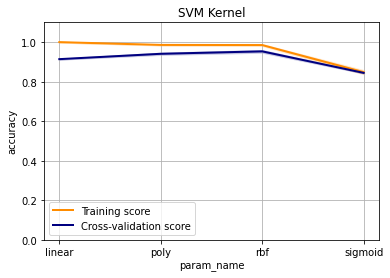

In [9]:
# optimize kernal

# regularization_param = 1
# # kernal = 'rbf' #{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
# degree = 3 # polynormal kernal degree, ignored by all other kernals, default=3
# gamma = 'scale' # gamma{‘scale’, ‘auto’} or float, default=’scale’
# coef0 = 0.0 # float, Independent term in kernel function. Only significant in ‘poly’ and ‘sigmoid’. default=0.0
# # shrinkingbool, default=True
# # probabilitybool, default=False
# # tolfloat, default=1e-3 Tolerance for stopping criterion.
# max_iter = -1 #int, default=-1
# random_state = 0 #int default= None
classifier = SVC()

cv = KFold(n_splits=2, shuffle=True, random_state=0)

param_range = ('linear', 'poly', 'rbf', 'sigmoid')

train_scores, test_scores, labeled_train, labeled_test = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='kernel', param_range=param_range,
                      cv=cv, is_log_axis=False, scoring='accuracy', n_jobs=8, title='SVM Kernel')


In [ ]:
# optimize C

regularization_param = [1e-4, 5e-3, 1e-3, 5e-2, 1e-2, 5e-1, 1e-1, 5e-0, 1e0, 
                       5e0, 1e1, 5e1, 1e2, 5e2, 1e3, 1e3, 1e4, 5e4, 1e5]
# # kernal = 'rbf' #{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
# degree = 3 # polynormal kernal degree, ignored by all other kernals, default=3
# gamma = 'scale' # gamma{‘scale’, ‘auto’} or float, default=’scale’
# coef0 = 0.0 # float, Independent term in kernel function. Only significant in ‘poly’ and ‘sigmoid’. default=0.0
# # shrinkingbool, default=True
# # probabilitybool, default=False
# # tolfloat, default=1e-3 Tolerance for stopping criterion.
# max_iter = -1 #int, default=-1
# random_state = 0 #int default= None
classifier = SVC(kernel='rbf')

cv = KFold(n_splits=2, shuffle=True, random_state=0)

param_range = regularization_param

train_scores, test_scores, labeled_train, labeled_test = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='C', param_range=param_range,
                      cv=cv, is_log_axis=True, scoring='accuracy', n_jobs=8, title='SVM Kernel')


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

In [5]:
test_scores

NameError: name 'test_scores' is not defined

# Learning Curves

In [ ]:
classifier = SVC(n_neighbors=1)
cv = KFold(n_splits=3, shuffle=True, random_state=0)

title = 'KNN Learning Curve'
plot_learning_curve(classifier, title, X_train, y_train_ohe, axes=None, ylim=None, cv=cv,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy', iterations=1)
